# Задача 17
Идентификация видов стекла. Часто на месте преступления остаются осколки разных видов стекол, которые можно использовать как улики, если определить тип стекла и от каких оно объектов. Выборка состоит из 9 признаков - химических параметров образцов и 214 объектов. Необходимо каждому образцу сопоставить один из 6 классов (например: стекло автомобиля, осколок посуды, окно здания) и сравнить качество работы решающего дерева и алгоритма решающего дерева и алгоритма k-ближайших соседей. В качестве функции ошибки использовать долю неправильных ответов классификатора. Дает ли масштабирование признаков значительное улучшение в качестве классификации?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
glass = pd.read_csv('glass.data.csv')
glass_data =  glass.drop(['Id','Type'], axis='columns')

In [3]:
glass_data.head(5)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


# Кросс-валидация

In [4]:
from sklearn import cross_validation, metrics
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(glass_data, glass['Type'], test_size = 0.3, random_state = 1)

C:\Users\user\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Решающее дерево 

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
predict_DecisionTree = clf_tree.predict(test_data)
accuracy_DecisionTree = metrics.accuracy_score(predict_DecisionTree, test_labels)
print accuracy_DecisionTree

0.723076923077


# K-ближайших соседей

In [7]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
predict_KNeighbors = neigh.predict(test_data)
accuracy_KNeighbors = metrics.accuracy_score(predict_KNeighbors, test_labels)
print accuracy_KNeighbors

0.738461538462


# Зависимость значения ошибки от объема выборки

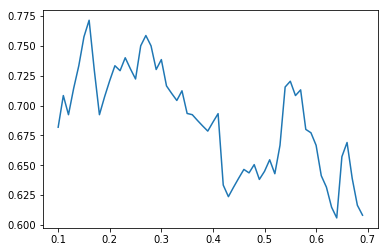

In [13]:
x = np.arange(0.1, 0.7, 0.01)
y = []
for i in x:
    train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(glass_data, glass['Type'], test_size = i, random_state = 1)
    neigh.fit(train_data, train_labels)
    predict_KNeighbors = neigh.predict(test_data)
    accuracy_KNeighbors = metrics.accuracy_score(predict_KNeighbors, test_labels)
    y.append(accuracy_KNeighbors)
plt.plot(x, y)
plt.show()